<a href="https://colab.research.google.com/github/ahmedabdurahim/Machine-learning/blob/main/StockPricePredictionModel_1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [65]:
df = yf.download('EURUSD=X', start='2012-01-01', end='2022-12-17')
#show the data

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,1.296008,1.296395,1.292257,1.296008,1.296008,0
2012-01-03,1.293628,1.306592,1.293628,1.294096,1.294096,0
2012-01-04,1.305398,1.307395,1.290206,1.305602,1.305602,0
2012-01-05,1.293092,1.294297,1.278527,1.293142,1.293142,0
2012-01-06,1.279296,1.281296,1.270406,1.279607,1.279607,0
...,...,...,...,...,...,...
2022-12-12,1.052222,1.057921,1.050707,1.052222,1.052222,0
2022-12-13,1.054174,1.066894,1.052931,1.054174,1.054174,0
2022-12-14,1.062665,1.066985,1.062011,1.062665,1.062665,0


In [66]:
df.shape

(2855, 6)

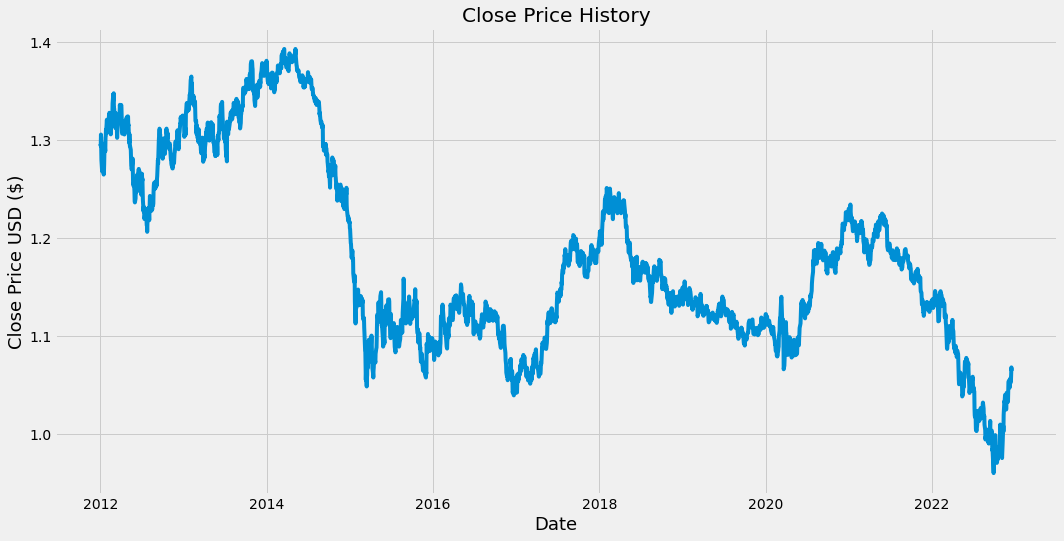

In [67]:
#Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [68]:
# New DataFrame with only Close column
data = df.filter(['Close'])
#Convert the datafram to a numpy array
dataset = data.values
#Get no of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2284

In [69]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.77604068],
       [0.77163002],
       [0.79817397],
       ...,
       [0.23772481],
       [0.24918899],
       [0.24093338]])

In [70]:
#Create training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data to x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()

[array([0.77604068, 0.77163002, 0.79817397, 0.76942937, 0.73820306,
       0.71151363, 0.73356414, 0.72800174, 0.72156341, 0.74384247,
       0.70381822, 0.70843816, 0.72665197, 0.7543452 , 0.7771652 ,
       0.75866675, 0.79146449, 0.79471734, 0.81001794, 0.80665261,
       0.83322214, 0.81744768, 0.80301887, 0.82447398, 0.81689023,
       0.8145826 , 0.81331122, 0.84258769, 0.84258769, 0.84948721,
       0.83987717, 0.82167545, 0.81609407, 0.79864589, 0.81450312,
       0.83765562, 0.83249775, 0.84137324, 0.84424877, 0.87144587,
       0.89300989, 0.87905657, 0.89552241, 0.85928041, 0.85968991,
       0.82819986, 0.83733275, 0.81370834, 0.81752744, 0.84867372,
       0.81410573, 0.82407384, 0.80380788, 0.79044694, 0.80341351,
       0.82611553, 0.83813991, 0.84007903, 0.83571925, 0.83249775])]
[0.8505451851330346]

[array([0.77604068, 0.77163002, 0.79817397, 0.76942937, 0.73820306,
       0.71151363, 0.73356414, 0.72800174, 0.72156341, 0.74384247,
       0.70381822, 0.70843816, 0.726

In [71]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [72]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2224, 60, 1)

In [73]:
#Build the Lstm Model

model = Sequential()
model.add(LSTM (50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [74]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2224/2224 [==============================] - 80s 34ms/step - loss: 0.0015
Epoch 2/10
2224/2224 [==============================] - 77s 35ms/step - loss: 6.2740e-04
Epoch 3/10
2224/2224 [==============================] - 78s 35ms/step - loss: 4.5046e-04
Epoch 4/10
2224/2224 [==============================] - 77s 35ms/step - loss: 4.5953e-04
Epoch 5/10
2224/2224 [==============================] - 78s 35ms/step - loss: 4.4897e-04
Epoch 6/10
2224/2224 [==============================] - 79s 35ms/step - loss: 3.9797e-04
Epoch 7/10
2224/2224 [==============================] - 79s 35ms/step - loss: 3.7999e-04
Epoch 8/10
2224/2224 [==============================] - 78s 35ms/step - loss: 3.6876e-04
Epoch 9/10
2224/2224 [==============================] - 78s 35ms/step - loss: 3.6726e-04
Epoch 10/10
2224/2224 [==============================] - 79s 36ms/step - loss: 3.3493e-04


In [76]:
#Create testing dataset
#Create new array containing scaled values from index 2104 to 2705
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [77]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [78]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [79]:
#Get models predicted value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


18/18 [==============================] - 1s 21ms/step


In [80]:
#Get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

0.0012704007679860772

<ipython-input-81-7b801239e163>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


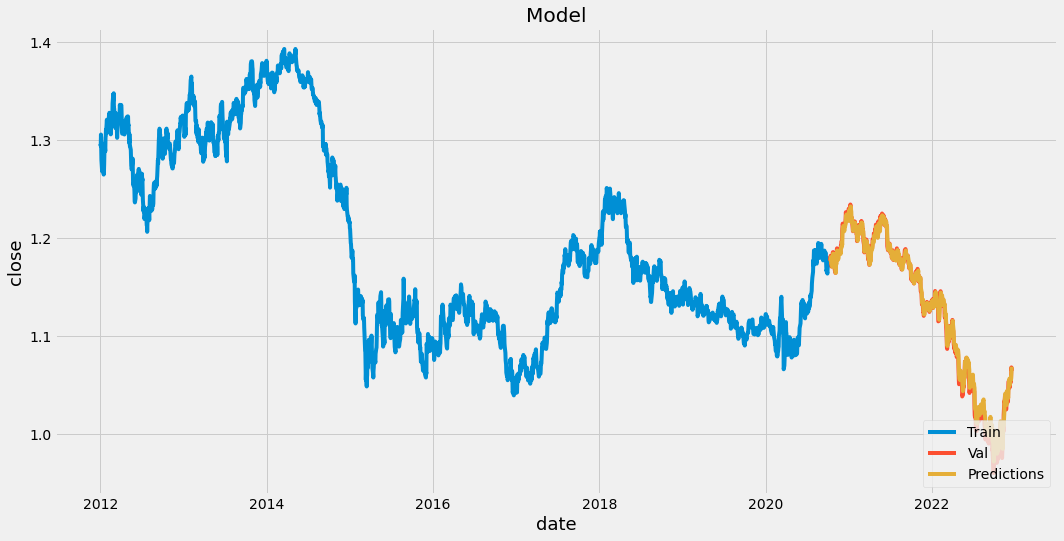

In [81]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date', fontsize = 18)
plt.ylabel('close', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [85]:
#show the valid and predicted prices
valid
# valid.to_csv('EURUSD trained results.csv', header=False, index=False)

In [83]:
Quote = ['MMM','ABT','ADM','ADBE','T','ADSK','COST','DAL','IBM','MCD','META','MRNA','NFLX']
for i in range(len(Quote)):
  EndDate = '2022-11-12'
  apple_quote =yf.download(Quote[i], start = '2012-01-01', end = EndDate)
  new_df = apple_quote.filter(['Close'])
  last_60_days = new_df[-60:].values
  last_60_days_scaled = scaler.transform(last_60_days)
  X_test = []
  X_test.append(last_60_days_scaled)
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  pred_price = model.predict(X_test)
  pred_price = scaler.inverse_transform(pred_price)
  print("Prediction for " + Quote[i] + " on " + str(EndDate) + " close is " + str(pred_price[0,0]))


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 57ms/step
Prediction for MMM on 2022-11-12 close is 2.6462212
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 50ms/step
Prediction for ABT on 2022-11-12 close is 2.6466784
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 49ms/step
Prediction for ADM on 2022-11-12 close is 2.64678
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 53ms/step
Prediction for ADBE on 2022-11-12 close is 2.643092
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 31ms/step
Prediction for T on 2022-11-12 close is 2.6549263
[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 35ms/step
Prediction for ADS

In [84]:
for i in range(len(Quote)):
  apple_quote2 = yf.download(Quote[i], start = EndDate, end = EndDate)
  print(str(Quote[i]) + " " + str(apple_quote2['Close']))

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MMM: No data found for this date range, symbol may be delisted
MMM Series([], Name: Close, dtype: float64)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ABT: No data found for this date range, symbol may be delisted
ABT Series([], Name: Close, dtype: float64)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADM: No data found for this date range, symbol may be delisted
ADM Series([], Name: Close, dtype: float64)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADBE: No data found for this date range, symbol may be delisted
ADBE Series([], Name: Close, dtype: float64)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- T: No data found for this date range, symbol may be delisted
T Series([], Name: Close, dtype: float64)
[***********